In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from geneflow import GeneFlow
from geneflow.ops import RandomInputs, RandomMutations1D, UniformCrossover1D
from geneflow.selection import SelectFittest
from geneflow.fitness import SumGenes

Using cupy backend


In [34]:
NUM_EVOLUTIONS = 10
POPULATION_SIZE = 512 
GENE_SIZE = 1024

In [35]:
# basic evolution graph
inputs = RandomInputs((POPULATION_SIZE, GENE_SIZE), max_value=1)
x = RandomMutations1D(max_gene_value=1, min_gene_value=0)(inputs)
outputs = UniformCrossover1D()(x)

In [36]:
gf = GeneFlow(inputs, outputs)
gf.summary()

OP (type)                                       Output Shape    Inputs
----------------------------------------------  --------------  ------------------------
randominputs_63FC3D (RandomInputs)              (512, 1024)
randommutations1d_6C8CE7 (RandomMutations1D)    []              randominputs_63FC3D
uniformcrossover1d_2028A1 (UniformCrossover1D)  []              randommutations1d_6C8CE7


In [37]:
fitness_function = SumGenes(expected_max_value=GENE_SIZE)
evolution_strategy = SelectFittest()
gf.compile(evolution_strategy, fitness_function)

In [38]:
results = gf.evolve(num_evolutions=NUM_EVOLUTIONS)

In [39]:
results.display_populations(top_k=10, precision=0)

  fit score  genes
-----------  ---------------------------------------
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


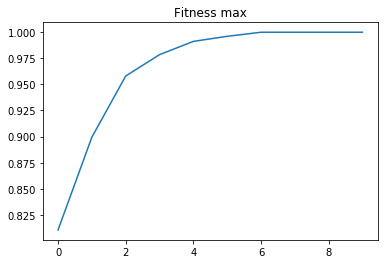

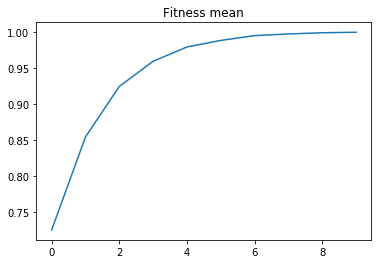

In [40]:
results.plot_metrics()